# 0. Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

sns.set_theme()

In [ ]:
df = pd.read_csv('data/kill_match_stats_v2.csv')
df.head()

,killed_by,type,time,phase,dis,kx,ky,vx,vy
0,M16A4,AR,1035,2,194,4970,3126,4978,3320
1,AKM,AR,1422,4,7,4604,4147,4598,4144
2,AKM,AR,1210,3,8,4880,3472,4874,3477
3,SKS,DMR,1818,7,124,5011,4251,4930,4345
4,M416,AR,1766,7,85,4955,4298,4958,4383


## 3.2. Câu hỏi 2
**Câu hỏi:** <span style = "color:red">Những vị trí nào giao tranh nhiều?</span>

**Ý nghĩa:** Trên bản đồ sẽ có những khu vực giao tranh nhộn nhịp hơn những khu vực khác, biết được các khu vực này giúp player chọn nơi nhảy dù, trú ẩn phù hợp với lối chơi của mình
- Ví dụ player thích thử thách, nâng cao kỹ năng, có thể chọn các khu vực đông đúng, giao tranh xảy ra liên tục
- Nếu người chơi chọn lối chơi sinh tồn có thể chọn các khu vực yên ắng, ít người

**Phân tích:** Câu hỏi này có thể trả lời dễ dàng bằng phân bố tọa độ 2 chiều đã làm ở `Data Understanding`

Text(0.5, 1.0, 'Victim position')

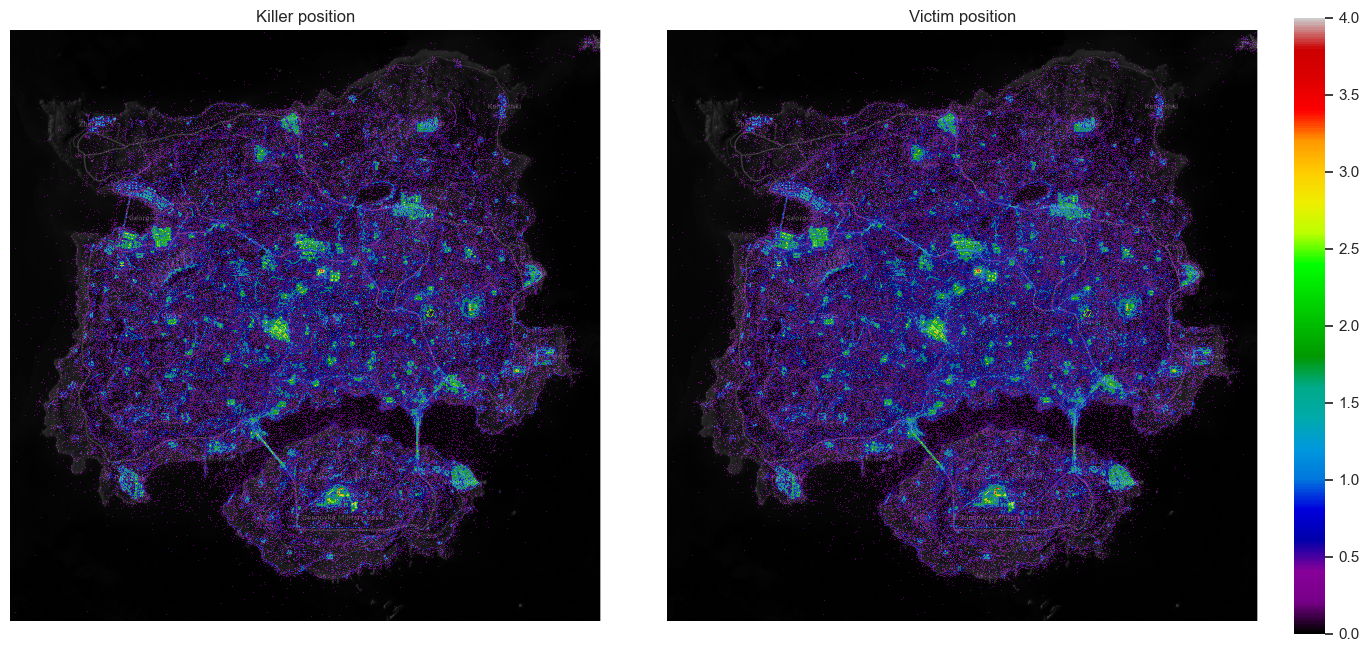

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize = (18, 8), gridspec_kw={'width_ratios': [8, 10]})
fig.subplots_adjust(wspace = 0.1)
img = plt.imread('asset/map/ERANGEL.png')

number_of_bin = 1600

axes[0].imshow(img[::-1, :, 0], extent = [0, 1640, 0, 1640], alpha = 0.35, zorder = 3, cmap = 'gray')
axes[1].imshow(img[::-1, :, 0], extent = [0, 1640, 0, 1640], alpha = 0.35, zorder = 3, cmap = 'gray')

sns.heatmap(
    np.log10(plt.hist2d(df['ky'], df['kx'], bins = number_of_bin, range = [[0, 8000], [0, 8000]])[0] + 1),
    cbar = False, cmap = 'nipy_spectral', ax = axes[0], vmin = 0, vmax = 4)

axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].set_title('Killer position')

sns.heatmap(
    np.log10(plt.hist2d(df['vy'], df['vx'], bins = number_of_bin, range = [[0, 8000], [0, 8000]])[0] + 1), 
    cmap = 'nipy_spectral', ax = axes[1], vmin = 0, vmax = 4)

axes[1].set_xticklabels([])
axes[1].set_yticklabels([])
axes[1].set_title('Victim position')